In [569]:
import pandas as pd #행렬
import numpy as np
import urllib.request as req # web download request
import matplotlib.pyplot as plt # 그래프
import os 
from sklearn.preprocessing import StandardScaler # 스케일링
from sklearn.preprocessing import Normalizer # 스케일링
from sklearn.decomposition import PCA # 주성분분석 - 차원 축소
from sklearn.cluster import DBSCAN # DBSCAN clustering
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

In [570]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
DATA_PATH = os.path.join('data') # 데이터 저장 폴더
ColumnList = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] # wine 성분 데이터 ColumnList

In [571]:
def fetch_wine_data(): # data 폴더와 wine의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_wine_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [572]:
fetch_wine_data()
wine = load_wine_data()
feature = wine.iloc[:,1:14]
feature

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [573]:
scaler = StandardScaler()
result = scaler.fit_transform(feature)
result = pd.DataFrame(result,columns=ColumnList[1:14])
result

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [574]:
pca = PCA(n_components=2)
result = pca.fit_transform(result)
result = pd.DataFrame(result, columns=['x','y'])

In [575]:
# create model and prediction
model = DBSCAN(eps=0.55,min_samples=5) # 거리 0.32, 주변 밀집도 5으로 설정
predict = pd.DataFrame(model.fit_predict(result))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([result,predict,wine['Class']],axis=1)
r

,x,y,predict,Class
0,3.316751,-1.443463,0,1
1,2.209465,0.333393,0,1
2,2.516740,-1.031151,0,1
3,3.757066,-2.756372,-1,1
4,1.008908,-0.869831,0,1
...,...,...,...,...
173,-3.370524,-2.216289,2,3
174,-2.601956,-1.757229,2,3
175,-2.677839,-2.760899,2,3
176,-2.387017,-2.297347,2,3


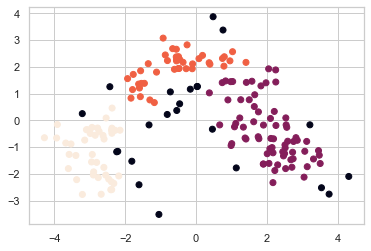

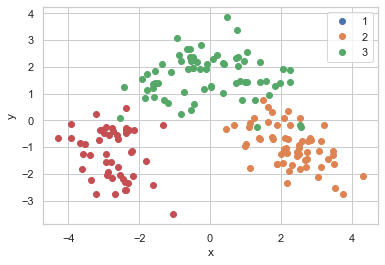

In [576]:
plt.scatter(r['x'],r['y'],c=r['predict'])
plt.show()

for i in range (0,4,1):
    wineList = r[r['Class']==i]
    plt.plot(wineList['x'],wineList['y'], 'o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(wine['Class'].unique(), loc='best')

In [577]:
ct = pd.crosstab(r['predict'], r['Class'])
ct

Class,1,2,3
predict,,,
-1,6,10,7
0,53,18,0
1,0,42,0
2,0,1,41


In [578]:
def elbow(x): # https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(x)
    distances, indices = neigh.kneighbors(x)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

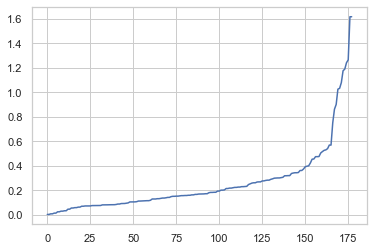

In [579]:
elbow(r)